In [39]:
import librosa
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
valid_species = ['Asellia tridens', 'Eptesicus bottae', 'Myotis emarginatus', 'Pipistrellus kuhli', 'Rhinopoma muscatellum', 'Rhyneptesicus nasutus', 'Rousettus aegyptius', 'Taphozous perforatus']

In [27]:
audio_folder_name= r"data\Identified calls"

def getLength(sp,filename):
    audio_path = join(audio_folder_name, sp, filename)
    data, sr = librosa.load(audio_path, sr = 22050)
    return np.size(data,0)/22050

file_names = []
file_length = []
for sp in valid_species:
    curr_file_names = listdir(join(audio_folder_name,sp))
    for f in curr_file_names:
        if f.endswith('.WAV') or f.endswith('.wav'):
            file_names.append(f)
            file_length.append(getLength(sp,f))


In [29]:
df = pd.DataFrame(list(zip(file_names,file_length)),columns=['Filename','Length'])
df.head(4)

,Filename,Length
0,ASETRI_058_20180212_D1000.WAV,8.874331
1,ASETRI_058_20180212_D1000_10X.wav,31.903810
2,ASETRI_058_20180212_D240.wav,35.423492
3,ASETRI_20180118_D1000.wav,11.378186


In [30]:
def getSpecies(x):
    part = x.split('_')
    return part[0]

df['Species'] =df['Filename'].apply(getSpecies)

In [31]:
df.head(5)

,Filename,Length,Species
0,ASETRI_058_20180212_D1000.WAV,8.874331,ASETRI
1,ASETRI_058_20180212_D1000_10X.wav,31.903810,ASETRI
2,ASETRI_058_20180212_D240.wav,35.423492,ASETRI
3,ASETRI_20180118_D1000.wav,11.378186,ASETRI
4,EPTBOT_064_20180219_D1000.WAV,10.751655,EPTBOT


In [33]:
df.groupby(['Species']).mean()

,Length
Species,
ASETRI,21.894955
EPTBOT,77.209531
MYOEMA,44.994009
PIPKUH,64.080567
RHIMUS,54.145984
RHYNAS,57.325367
ROUAEG,26.329294
TAPPER,46.160893


In [35]:
df.groupby(['Species']).min()

,Filename,Length
Species,,
ASETRI,ASETRI_058_20180212_D1000.WAV,8.874331
EPTBOT,EPTBOT_064_20180219_D1000.WAV,10.751655
MYOEMA,MYOEMA_010_20180131_D1000.WAV,8.020998
PIPKUH,PIPKUH_002_20180128_D1000.WAV,7.508980
RHIMUS,RHIMUS_001_20180119_D1000.WAV,7.508980
RHYNAS,RHYNAS_035_20180206_D1000.WAV,8.020998
ROUAEG,ROUAEG_039_20180209_D1000.WAV,10.239637
TAPPER,TAPPER_012_20180204_D1000.WAV,12.628980


In [36]:
df.groupby(['Species']).max()

,Filename,Length
Species,,
ASETRI,ASETRI_20180118_D1000.wav,35.423492
EPTBOT,EPTBOT_065_20180219_D240.wav,232.106122
MYOEMA,MYOEMA_071_20180304_D240.wav,106.576100
PIPKUH,PIPKUH_066_20180222_D1000_10X.WAV,220.159456
RHIMUS,RHIMUS_059_20180212_D240.wav,413.942902
RHYNAS,RHYNAS_069_20180227_D240.wav,172.372789
ROUAEG,ROUAEG_072_20180304_D240.wav,65.427846
TAPPER,TAPPER_034_20180204_D240.wav,167.249615


# Split Audio to seperate silence

In [54]:
def plot_signals(signals):
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=True, figsize=(20,5))
    fig.suptitle('Time Series'+ list(signals.keys())[0], size=16)
    plt.plot(list(signals.values())[0])


In [ ]:
def split(split_list):
    a =0
    

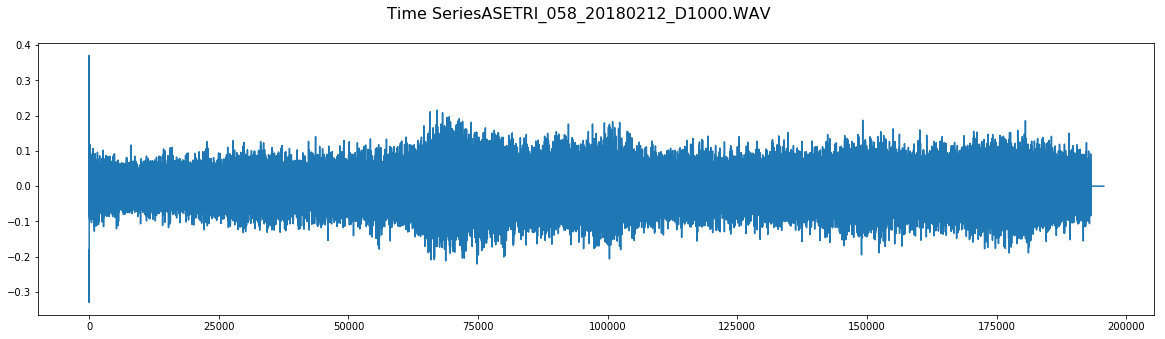

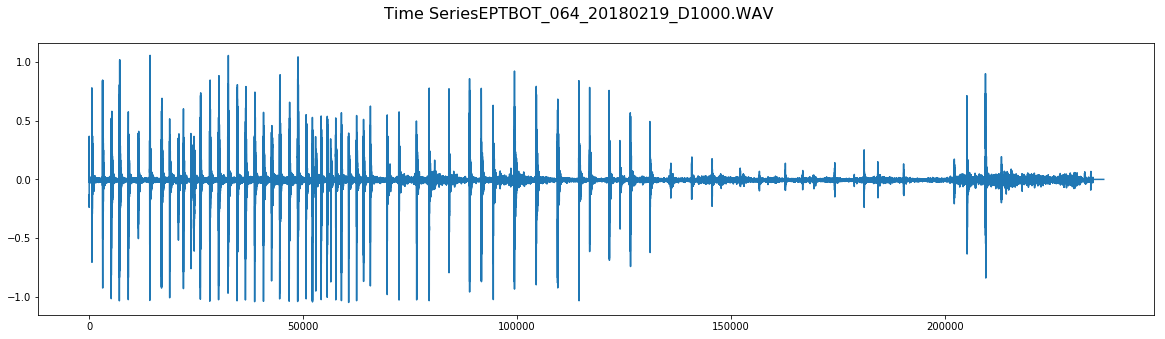

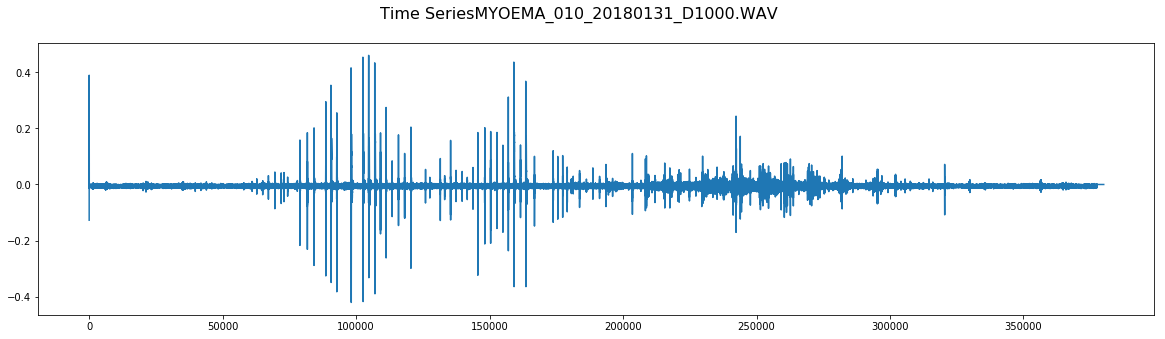

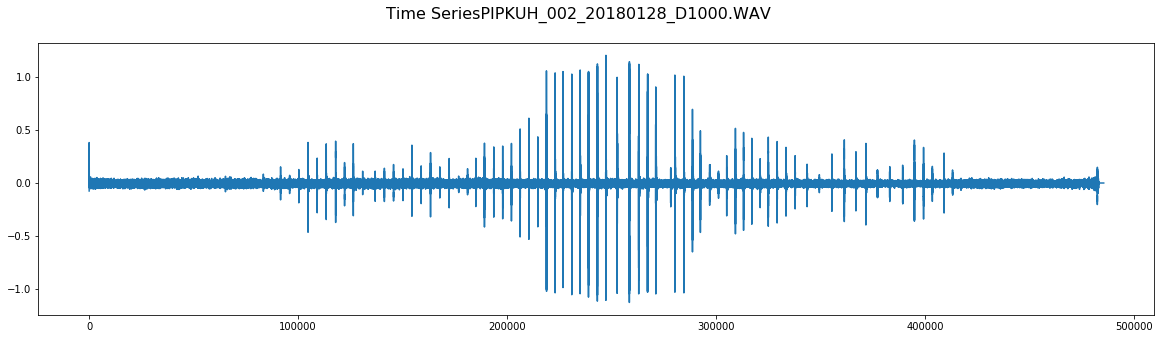

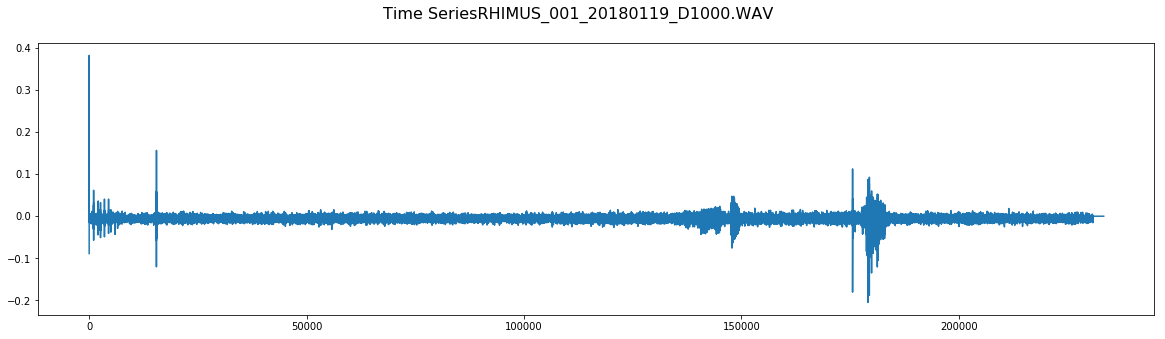

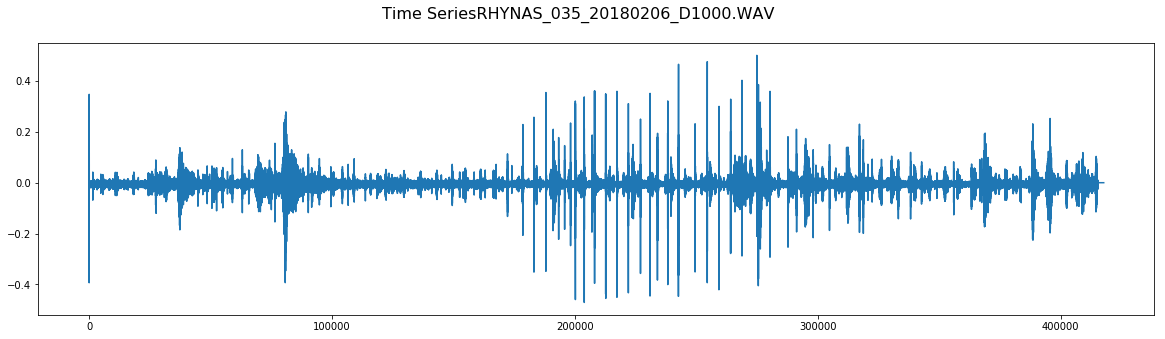

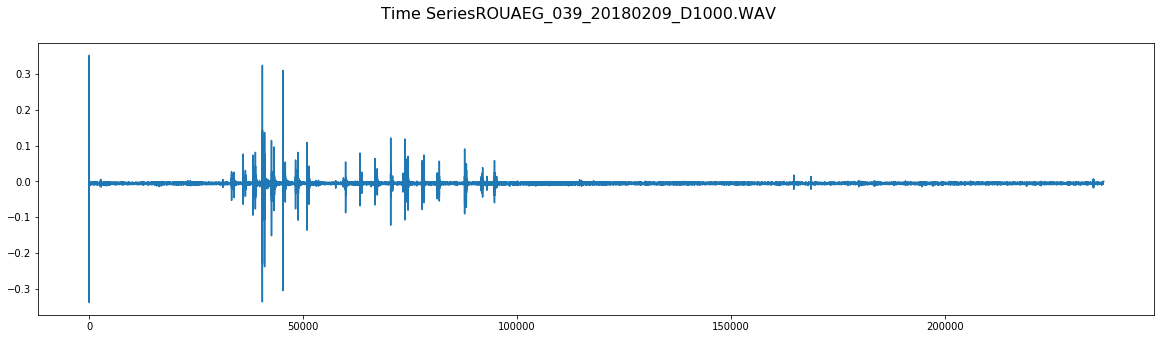

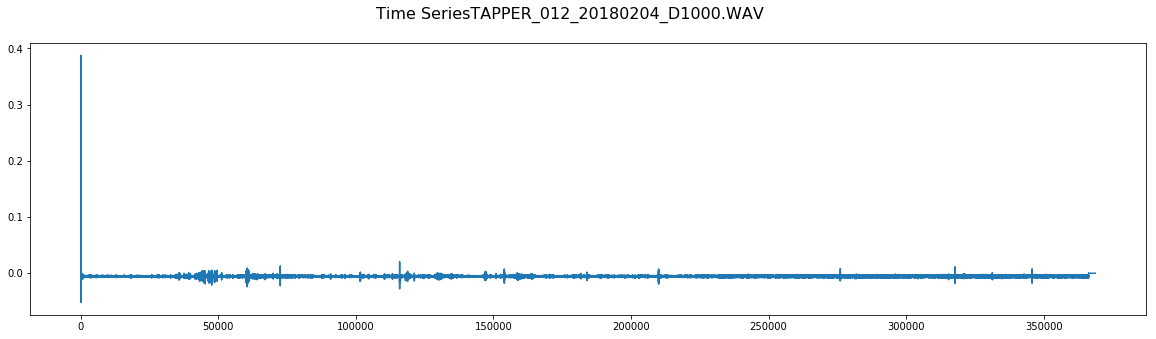

In [55]:
for sp in valid_species:
    curr_file_names = listdir(join(audio_folder_name,sp))
    for f in curr_file_names:
        if f.endswith('.WAV') or f.endswith('.wav'):
            data, sr = librosa.load(join(audio_folder_name,sp,f), sr = 22050)
            signal ={f:data}
            plot_signals(signal)
            break